In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Controllers velocity dataset of the simulation
The controller velocity files contains the datasets of the the outputs and inputs (Z position, linear speeds X and Y and yaw rate) of the controller, where the inputs correspond to the local data in controllerVelocityLocal.csv and the outputs to the odometry data in controllerVelocityOdom.csv. Three controllers were tested (P Proportional, PI Proportinal-Integral, PID Proportinal-Integral-Derivative), five times each, to determine which of them have a better performance.

In the datasets each controller was tested five times, both datasets must have five columns per test (timestamp, Z position, X velocity, Y velocity and yaw rate), each test is named as its controller and numerate from 1 to 5, for example *P1_pos_Z* makes reference to the Z position of first test of the controller P.

In [3]:
local_file = "./data/controllerVelocityLocal_2.csv"
local_data = pd.read_csv(local_file)

odom_file = "./data/controllerVelocityOdom_2.csv"
odom_data = pd.read_csv(odom_file)

In [4]:
local_data

,P1_time_percent,P1_pos_Z,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_time_percent,P2_pos_Z,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_time_percent,P3_pos_Z,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_time_percent,P4_pos_Z,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_time_percent,P5_pos_Z,P5_vel_X,P5_vel_Y,P5_yaw_rate,PI1_time_percent,PI1_pos_Z,PI1_vel_X,PI1_vel_Y,PI1_yaw_rate,PI2_time_percent,PI2_pos_Z,PI2_vel_X,PI2_vel_Y,PI2_yaw_rate,PI3_time_percent,PI3_pos_Z,PI3_vel_X,PI3_vel_Y,PI3_yaw_rate,PI4_time_percent,PI4_pos_Z,PI4_vel_X,PI4_vel_Y,PI4_yaw_rate,PI5_time_percent,PI5_pos_Z,PI5_vel_X,PI5_vel_Y,PI5_yaw_rate,PID1_time_percent,PID1_pos_Z,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_time_percent,PID2_pos_Z,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_time_percent,PID3_pos_Z,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_time_percent,PID4_pos_Z,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_time_percent,PID5_pos_Z,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,2.839785e+12,3.400000,-0.334499,0.364091,0.147960,2.791697e+12,3.5,-0.367179,0.338123,0.155662,2880469000000,3.500000,-0.368392,0.326828,0.134077,2.802321e+12,3.450,-0.308713,0.313951,0.103795,2.787377e+12,3.5,-0.337689,0.339775,0.150885,2.860869e+12,3.425,-0.523019,0.644410,0.146817,2.795269e+12,3.425000,-0.514349,0.568980,0.138859,2.789853e+12,3.5,-0.524501,0.573170,0.161591,2.794001e+12,3.5,-0.527701,0.523867,0.109894,2.783693e+12,3.450,-0.551427,0.575311,0.121109,2.789485e+12,3.425,-0.75,0.75,0.146352,2.801409e+12,3.425,-0.721001,0.647310,0.154825,2.844341e+12,3.425000,-0.75,0.644274,0.142372,2.782809e+12,3.450,-0.75,0.716920,0.173809,2.846573e+12,3.45,-0.750000,0.750000,0.090968
1,2.839893e+12,3.375000,-0.334689,0.364092,0.148170,2.791809e+12,3.5,-0.388658,0.377125,0.154742,2880553000000,3.500000,-0.368463,0.327979,0.133662,2.802421e+12,3.450,-0.311800,0.323950,0.112243,2.787473e+12,3.5,-0.337170,0.339267,0.151461,2.860869e+12,3.425,-0.524514,0.658059,0.084429,2.795385e+12,3.400000,-0.542369,0.620594,0.137035,2.789941e+12,3.5,-0.522229,0.586420,0.161253,2.794001e+12,3.5,-0.528050,0.526684,0.116547,2.783789e+12,3.425,-0.551620,0.573635,0.120773,2.789577e+12,3.425,-0.75,0.75,0.146231,2.801497e+12,3.425,-0.750000,0.707626,0.154908,2.844433e+12,3.400000,-0.75,0.653015,0.142159,2.782929e+12,3.425,-0.75,0.719617,0.176614,2.846649e+12,3.45,-0.750000,0.750000,0.089136
2,2.839981e+12,3.349999,-0.312593,0.355081,0.142037,2.791921e+12,3.5,-0.358356,0.347322,0.143792,2880661000000,3.500000,-0.368534,0.329130,0.133247,2.802525e+12,3.450,-0.311561,0.324951,0.110884,2.787573e+12,3.5,-0.320597,0.359356,0.159297,2.860973e+12,3.425,-0.527052,0.666246,0.080658,2.795465e+12,3.375000,-0.544815,0.624826,0.136657,2.789941e+12,3.5,-0.520911,0.594294,0.159392,2.794089e+12,3.5,-0.529069,0.526563,0.116351,2.783893e+12,3.400,-0.558128,0.640352,0.130067,2.789661e+12,3.425,-0.75,0.75,0.146109,2.801497e+12,3.425,-0.750000,0.731919,0.157573,2.844525e+12,3.375000,-0.75,0.659659,0.147718,2.783045e+12,3.400,-0.75,0.722316,0.179420,2.846757e+12,3.45,-0.750000,0.714895,0.098481
3,2.840061e+12,3.324999,-0.310920,0.354328,0.141932,2.791921e+12,3.5,-0.343672,0.338213,0.141958,2880781000000,3.500000,-0.423453,0.408959,0.057598,2.802625e+12,3.425,-0.361302,0.395375,0.116952,2.787649e+12,3.5,-0.318795,0.360496,0.160267,2.861057e+12,3.425,-0.468758,0.591030,0.096947,2.795741e+12,3.349999,-0.547262,0.629063,0.136278,2.790021e+12,3.5,-0.507404,0.590910,0.158061,2.794205e+12,3.5,-0.521999,0.527886,0.117999,2.784001e+12,3.375,-0.558839,0.644279,0.130191,2.789749e+12,3.425,-0.75,0.75,0.145207,2.801593e+12,3.425,-0.686675,0.654827,0.157114,2.844625e+12,3.349999,-0.75,0.668822,0.147811,2.783153e+12,3.375,-0.75,0.725017,0.182227,2.847021e+12,3.45,-0.750000,0.724366,0.097238
4,2.840241e+12,3.299999,-0.309247,0.353575,0.141827,2.792029e+12,3.5,-0.343021,0.339008,0.141431,2880881000000,3.500000,-0.447666,0.444811,0.001677,2.802733e+12,3.400,-0.365303,0.402265,0.115998,2.787781e+12,3.5,-0.316993,0.361635,0.161238,2.861061e+12,3.425,-0.458797,0.576414,0.111861,2.795829e+12,3.324999,-0.549712,

In [5]:
odom_data

,P1_time_percent,P1_pos_Z,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_time_percent,P2_pos_Z,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_time_percent,P3_pos_Z,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_time_percent,P4_pos_Z,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_time_percent,P5_pos_Z,P5_vel_X,P5_vel_Y,P5_yaw_rate,PI1_time_percent,PI1_pos_Z,PI1_vel_X,PI1_vel_Y,PI1_yaw_rate,PI2_time_percent,PI2_pos_Z,PI2_vel_X,PI2_vel_Y,PI2_yaw_rate,PI3_time_percent,PI3_pos_Z,PI3_vel_X,PI3_vel_Y,PI3_yaw_rate,PI4_time_percent,PI4_pos_Z,PI4_vel_X,PI4_vel_Y,PI4_yaw_rate,PI5_time_percent,PI5_pos_Z,PI5_vel_X,PI5_vel_Y,PI5_yaw_rate,PID1_time_percent,PID1_pos_Z,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_time_percent,PID2_pos_Z,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_time_percent,PID3_pos_Z,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_time_percent,PID4_pos_Z,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_time_percent,PID5_pos_Z,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,2.839709e+12,3.546532,0.087533,0.057130,0.057130,2.791689e+12,3.611732,0.038131,0.083676,0.173657,2880457000000,3.532215,-0.036088,0.064345,-0.011976,2.802245e+12,3.651750,0.055016,0.069867,0.036286,2.787369e+12,3.557235,0.077147,0.070669,0.129188,2.860841e+12,3.503344,0.146613,0.019755,0.126650,2.795233e+12,3.528534,0.087360,0.079569,0.062579,2.789797e+12,3.601480,0.052191,0.101608,0.144081,2.794005e+12,3.569374,-0.008932,0.068163,0.038871,2.783693e+12,3.503282,0.080821,0.074310,0.133460,2.789473e+12,3.545837,0.093959,0.134657,0.061215,2.801369e+12,3.631645,0.070717,0.099086,0.148718,2.844253e+12,3.601581,-0.002203,0.199507,0.124067,2.782801e+12,3.529986,0.087340,0.119739,0.298008,2.846545e+12,3.595464,0.116679,0.231604,0.135301
1,2.839741e+12,3.550179,0.085134,0.030189,0.030189,2.791721e+12,3.614910,0.058414,0.122043,0.173271,2880493000000,3.531711,-0.038259,0.068826,-0.015078,2.802281e+12,3.651188,0.051691,0.073032,0.026277,2.787401e+12,3.560983,0.082738,0.086755,0.148743,2.860873e+12,3.504386,0.142410,0.007631,0.119029,2.795269e+12,3.529073,0.081083,0.068312,0.041102,2.789829e+12,3.605185,0.048601,0.064221,0.140342,2.794037e+12,3.569490,-0.010476,0.054833,0.036036,2.783725e+12,3.507488,0.114995,0.116629,0.130933,2.789505e+12,3.546223,0.088728,0.116084,0.051814,2.801401e+12,3.632230,0.077031,0.119726,0.095245,2.844281e+12,3.603301,0.036199,0.247994,0.122142,2.782833e+12,3.533722,0.150728,0.190218,0.312324,2.846581e+12,3.595272,0.123303,0.225281,0.147485
2,2.839781e+12,3.552724,0.096274,0.075065,0.075065,2.791757e+12,3.618310,0.092093,0.152777,0.176450,2880525000000,3.531423,-0.041668,0.059248,-0.007646,2.802313e+12,3.651789,0.035862,0.036692,0.035774,2.787433e+12,3.565528,0.109599,0.137096,0.142784,2.860909e+12,3.505737,0.146645,0.025095,0.087942,2.795301e+12,3.529404,0.073703,0.074221,0.013120,2.789865e+12,3.608768,0.056932,0.078402,0.149425,2.794073e+12,3.569455,-0.018664,0.046498,0.012627,2.783761e+12,3.510956,0.103691,0.075496,0.125221,2.789537e+12,3.546161,0.069606,0.109920,0.011820,2.801433e+12,3.631538,0.076590,0.105482,0.057262,2.844305e+12,3.605116,0.029093,0.224915,0.119503,2.782869e+12,3.536465,0.194273,0.249330,0.325879,2.846613e+12,3.597123,0.153186,0.274884,0.126009
3,2.839813e+12,3.554897,0.109877,0.070098,0.070098,2.791789e+12,3.620390,0.093058,0.123126,0.125414,2880553000000,3.531541,-0.054297,0.040357,0.011638,2.802341e+12,3.651682,0.034154,0.046542,0.072198,2.787469e+12,3.569589,0.120279,0.108964,0.123836,2.860941e+12,3.506957,0.117903,-0.018433,0.079534,2.795329e+12,3.529855,0.060988,0.058396,-0.003879,2.789897e+12,3.611762,0.080145,0.115856,0.131968,2.794105e+12,3.570266,-0.039164,0.034130,0.052419,2.783793e+12,3.514484,0.108286,0.097361,0.133267,2.789573e+12,3.547048,0.036684,0.064710,0.055237,2.801465e+12,3.631145,0.057434,0.070668,0.052970,2.844349e+12,3.607977,0.036114,0.229495,0.154805,2.782901e+12,3.538720,0.198186,0.258824,0.346104,2.846645e+12,3.599672,0.149193,0.250531,0.112623
4,2.839845e+12,3.557152,0.107735,0.046338,0.046338,2.791821e+12,3.621241,0.081238,0.138705,0.097320,2880593000000,3.532696,-0.044855,

The _controller_times_ dictionary contains the duration time of the simulation for each landing process. The time of the tests must be saved with the name of the test (as described above) in the _controllerTestTime.csv_ file n the columns _test_ and _duration_time_.

In [6]:
controller_times = {}

with open("./data/controllerTestTime_2.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)

{'P1': 42.22, 'P2': 46.97, 'P3': 73.98, 'P4': 52.94, 'P5': 56.34, 'PI1': 45.06, 'PI2': 55.11, 'PI3': 35.96, 'PI4': 34.0, 'PI5': 35.43, 'PID1': 29.04, 'PID2': 58.41, 'PID3': 51.92, 'PID4': 42.9, 'PID5': 52.57}


Calculate the time for each sample given the total time of each test and the timestamp of the simulation (time_percent in the dataset), knowing that the relationship between the duration time of the test and the timestamp is linear. It important to notice that the starting point of the duration time of the test is zero.

$\displaystyle m = \frac{time_{total}}{timestamp_n-timestamp_0}$ where $timestamp_0$ is the first value of the timestamps, $timestamp_n$ is the last value of the timestamps and $total time$ is the duration of the test.

$\displaystyle b = m.timestamp_n + time_{total}$

The linear relantionship between the timestamp ant the duration time of the tests is :
$\displaystyle time = m.timestamp + b$

Time calculation fot the local data.

In [7]:
for test, test_time in controller_times.items():    

    first_val_tstamp = local_data[test+"_time_percent"][0]
    last_val_tstamp = local_data[test+"_time_percent"][local_data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    local_data[test+"_time"] = m * local_data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

local_data = local_data.reindex(columns=sorted(local_data.columns))

Time calculation for the odometry data.

In [8]:
for test, test_time in controller_times.items():    

    first_val_tstamp = odom_data[test+"_time_percent"][0]
    last_val_tstamp = odom_data[test+"_time_percent"][odom_data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    odom_data[test+"_time"] = m * odom_data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

odom_data = odom_data.reindex(columns=sorted(odom_data.columns))

Delete the timestamp columns, as they won't be needed anymore.

In [9]:
local_droplist = [i for i in local_data.columns if 'time_percent' in i]
local_data.drop(local_droplist, axis=1, inplace=True)

odom_droplist = [i for i in odom_data.columns if 'time_percent' in i]
odom_data.drop(odom_droplist, axis=1, inplace=True)

In [10]:
local_data

,P1_pos_Z,P1_time,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_pos_Z,P2_time,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_pos_Z,P3_time,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_pos_Z,P4_time,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_pos_Z,P5_time,P5_vel_X,P5_vel_Y,P5_yaw_rate,PI1_pos_Z,PI1_time,PI1_vel_X,PI1_vel_Y,PI1_yaw_rate,PI2_pos_Z,PI2_time,PI2_vel_X,PI2_vel_Y,PI2_yaw_rate,PI3_pos_Z,PI3_time,PI3_vel_X,PI3_vel_Y,PI3_yaw_rate,PI4_pos_Z,PI4_time,PI4_vel_X,PI4_vel_Y,PI4_yaw_rate,PI5_pos_Z,PI5_time,PI5_vel_X,PI5_vel_Y,PI5_yaw_rate,PID1_pos_Z,PID1_time,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_pos_Z,PID2_time,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_pos_Z,PID3_time,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_pos_Z,PID4_time,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_pos_Z,PID5_time,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,3.400000,0.000000,-0.334499,0.364091,0.147960,3.5,0.000000,-0.367179,0.338123,0.155662,3.500000,0.000000,-0.368392,0.326828,0.134077,3.450,4.547474e-13,-0.308713,0.313951,0.103795,3.5,0.000000,-0.337689,0.339775,0.150885,3.425,-4.547474e-13,-0.523019,0.644410,0.146817,3.425000,4.547474e-13,-0.514349,0.568980,0.138859,3.5,0.000000,-0.524501,0.573170,0.161591,3.5,0.000000,-0.527701,0.523867,0.109894,3.450,-4.547474e-13,-0.551427,0.575311,0.121109,3.425,0.000000,-0.75,0.75,0.146352,3.425,0.000000,-0.721001,0.647310,0.154825,3.425000,0.000000,-0.75,0.644274,0.142372,3.450,0.000000,-0.75,0.716920,0.173809,3.45,0.000000,-0.750000,0.750000,0.090968
1,3.375000,0.113134,-0.334689,0.364092,0.148170,3.5,0.117153,-0.388658,0.377125,0.154742,3.500000,0.086123,-0.368463,0.327979,0.133662,3.450,1.034065e-01,-0.311800,0.323950,0.112243,3.5,0.099482,-0.337170,0.339267,0.151461,3.425,-4.547474e-13,-0.524514,0.658059,0.084429,3.400000,1.210108e-01,-0.542369,0.620594,0.137035,3.5,0.092475,-0.522229,0.586420,0.161253,3.5,0.000000,-0.528050,0.526684,0.116547,3.425,1.033447e-01,-0.551620,0.573635,0.120773,3.425,0.103090,-0.75,0.75,0.146231,3.425,0.090107,-0.750000,0.707626,0.154908,3.400000,0.095069,-0.75,0.653015,0.142159,3.425,0.127641,-0.75,0.719617,0.176614,3.45,0.078346,-0.750000,0.750000,0.089136
2,3.349999,0.205318,-0.312593,0.355081,0.142037,3.5,0.234306,-0.358356,0.347322,0.143792,3.500000,0.196853,-0.368534,0.329130,0.133247,3.450,2.109493e-01,-0.311561,0.324951,0.110884,3.5,0.203109,-0.320597,0.359356,0.159297,3.425,1.109957e-01,-0.527052,0.666246,0.080658,3.375000,2.044666e-01,-0.544815,0.624826,0.136657,3.5,0.092475,-0.520911,0.594294,0.159392,3.5,0.093337,-0.529069,0.526563,0.116351,3.400,2.153014e-01,-0.558128,0.640352,0.130067,3.425,0.197216,-0.75,0.75,0.146109,3.425,0.090107,-0.750000,0.731919,0.157573,3.375000,0.190138,-0.75,0.659659,0.147718,3.400,0.251026,-0.75,0.722316,0.179420,3.45,0.189679,-0.750000,0.714895,0.098481
3,3.324999,0.289121,-0.310920,0.354328,0.141932,3.5,0.234306,-0.343672,0.338213,0.141958,3.500000,0.319887,-0.423453,0.408959,0.057598,3.425,3.143558e-01,-0.361302,0.395375,0.116952,3.5,0.281866,-0.318795,0.360496,0.160267,3.425,2.006461e-01,-0.468758,0.591030,0.096947,3.349999,4.923889e-01,-0.547262,0.629063,0.136278,3.5,0.176542,-0.507404,0.590910,0.158061,3.5,0.216371,-0.521999,0.527886,0.117999,3.375,3.315642e-01,-0.558839,0.644279,0.130191,3.425,0.295823,-0.75,0.75,0.145207,3.425,0.188406,-0.686675,0.654827,0.157114,3.349999,0.293473,-0.75,0.668822,0.147811,3.375,0.365903,-0.75,0.725017,0.182227,3.45,0.461828,-0.750000,0.724366,0.097238
4,3.299999,0.477678,-0.309247,0.353575,0.141827,3.5,0.347275,-0.343021,0.339008,0.141431,3.500000,0.422415,-0.447666,0.444811,0.001677,3.400,4.260348e-01,-0.365303,0.402265,0.115998,3.5,0.418654,-0.316993,0.361635,0.161238,3.425,2.049152e-01,-0.458797,0.576414,0.111861,3.324999,5.841902e-01,-0.549712,0.633303,0.135899,3.5,0.260610,-0.538546,0.635941,0.150264,3.5,0.339406,-0.522303,0.527891,0.117897,3.375,4.564390e-01,-0.598749,0.726788,0.133634,3.425,0.407878,-0.75,0.75,0.145048,3.425,0.188406,-0.652151,0.623555,0.164599,3.324999,0.400943,-0.75,0.677974,0.147932,3.375,0.476525,-0.75,0.750000,0.163750,3.45,0.5

In [11]:
odom_data

,P1_pos_Z,P1_time,P1_vel_X,P1_vel_Y,P1_yaw_rate,P2_pos_Z,P2_time,P2_vel_X,P2_vel_Y,P2_yaw_rate,P3_pos_Z,P3_time,P3_vel_X,P3_vel_Y,P3_yaw_rate,P4_pos_Z,P4_time,P4_vel_X,P4_vel_Y,P4_yaw_rate,P5_pos_Z,P5_time,P5_vel_X,P5_vel_Y,P5_yaw_rate,PI1_pos_Z,PI1_time,PI1_vel_X,PI1_vel_Y,PI1_yaw_rate,PI2_pos_Z,PI2_time,PI2_vel_X,PI2_vel_Y,PI2_yaw_rate,PI3_pos_Z,PI3_time,PI3_vel_X,PI3_vel_Y,PI3_yaw_rate,PI4_pos_Z,PI4_time,PI4_vel_X,PI4_vel_Y,PI4_yaw_rate,PI5_pos_Z,PI5_time,PI5_vel_X,PI5_vel_Y,PI5_yaw_rate,PID1_pos_Z,PID1_time,PID1_vel_X,PID1_vel_Y,PID1_yaw_rate,PID2_pos_Z,PID2_time,PID2_vel_X,PID2_vel_Y,PID2_yaw_rate,PID3_pos_Z,PID3_time,PID3_vel_X,PID3_vel_Y,PID3_yaw_rate,PID4_pos_Z,PID4_time,PID4_vel_X,PID4_vel_Y,PID4_yaw_rate,PID5_pos_Z,PID5_time,PID5_vel_X,PID5_vel_Y,PID5_yaw_rate
0,3.546532,-4.547474e-13,0.087533,0.057130,0.057130,3.611732,0.000000,0.038131,0.083676,0.173657,3.532215,0.000000,-0.036088,0.064345,-0.011976,3.651750,0.000000,0.055016,0.069867,0.036286,3.557235,0.000,0.077147,0.070669,0.129188,3.503344,0.000000,0.146613,0.019755,0.126650,3.528534,0.000000,0.087360,0.079569,0.062579,3.601480,0.000000,0.052191,0.101608,0.144081,3.569374,0.000000,-0.008932,0.068163,0.038871,3.503282,0.000000,0.080821,0.074310,0.133460,3.545837,0.000000,0.093959,0.134657,0.061215,3.631645,-4.547474e-13,0.070717,0.099086,0.148718,3.601581,0.000000,-0.002203,0.199507,0.124067,3.529986,4.547474e-13,0.087340,0.119739,0.298008,3.595464,4.547474e-13,0.116679,0.231604,0.135301
1,3.550179,3.199697e-02,0.085134,0.030189,0.030189,3.614910,0.032001,0.058414,0.122043,0.173271,3.531711,0.036004,-0.038259,0.068826,-0.015078,3.651188,0.036003,0.051691,0.073032,0.026277,3.560983,0.032,0.082738,0.086755,0.148743,3.504386,0.032006,0.142410,0.007631,0.119029,3.529073,0.036001,0.081083,0.068312,0.041102,3.605185,0.032004,0.048601,0.064221,0.140342,3.569490,0.032004,-0.010476,0.054833,0.036036,3.507488,0.031998,0.114995,0.116629,0.130933,3.546223,0.031996,0.088728,0.116084,0.051814,3.632230,3.199890e-02,0.077031,0.119726,0.095245,3.603301,0.027998,0.036199,0.247994,0.122142,3.533722,3.200000e-02,0.150728,0.190218,0.312324,3.595272,3.600137e-02,0.123303,0.225281,0.147485
2,3.552724,7.199318e-02,0.096274,0.075065,0.075065,3.618310,0.068003,0.092093,0.152777,0.176450,3.531423,0.068007,-0.041668,0.059248,-0.007646,3.651789,0.068005,0.035862,0.036692,0.035774,3.565528,0.064,0.109599,0.137096,0.142784,3.505737,0.068012,0.146645,0.025095,0.087942,3.529404,0.068002,0.073703,0.074221,0.013120,3.608768,0.068008,0.056932,0.078402,0.149425,3.569455,0.068008,-0.018664,0.046498,0.012627,3.510956,0.067996,0.103691,0.075496,0.125221,3.546161,0.063991,0.069606,0.109920,0.011820,3.631538,6.399781e-02,0.076590,0.105482,0.057262,3.605116,0.051996,0.029093,0.224915,0.119503,3.536465,6.800000e-02,0.194273,0.249330,0.325879,3.597123,6.800259e-02,0.153186,0.274884,0.126009
3,3.554897,1.039901e-01,0.109877,0.070098,0.070098,3.620390,0.100004,0.093058,0.123126,0.125414,3.531541,0.096010,-0.054297,0.040357,0.011638,3.651682,0.096007,0.034154,0.046542,0.072198,3.569589,0.100,0.120279,0.108964,0.123836,3.506957,0.100018,0.117903,-0.018433,0.079534,3.529855,0.096003,0.060988,0.058396,-0.003879,3.611762,0.100011,0.080145,0.115856,0.131968,3.570266,0.100012,-0.039164,0.034130,0.052419,3.514484,0.099994,0.108286,0.097361,0.133267,3.547048,0.099986,0.036684,0.064710,0.055237,3.631145,9.599671e-02,0.057434,0.070668,0.052970,3.607977,0.095993,0.036114,0.229495,0.154805,3.538720,1.000000e-01,0.198186,0.258824,0.346104,3.599672,1.000038e-01,0.149193,0.250531,0.112623
4,3.557152,1.359871e-01,0.107735,0.046338,0.046338,3.621241,0.132006,0.081238,0.138705,0.097320,3.532696,0.136015,-0.044855,0.065782,0.085642,3.650605,0.136010,0.052707,0.078184,0.086884,3.572737,0.132,0.112847,0.100703,0.069196,3.508077,0.132023,0.107786,-0.030557,0.098094,3.531364,0.136005,0.024506,0.018614,0.031070,3.614102,0.132015,0.071037,0.075199,0.129123,3.572063,0.132016,-0.014056,0.070495,0.079244,3.517977,0.131993,0.126779,0.125

### Reorganize local and odom datasets to plot their results

Reorganize the local data to plot the results for each controller.

In [16]:
local_ctrl = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])
    row_num = local_data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = local_data[test+"_time"][0:row_num+1]
    control["Z_Position"] = local_data[test+"_pos_Z"][0:row_num+1]
    control["X_Velocity"] = local_data[test+"_vel_X"][0:row_num+1]
    control["Y_Velocity"] = local_data[test+"_vel_Y"][0:row_num+1]
    control["Yaw_Rate"] = local_data[test+"_yaw_rate"][0:row_num+1]
    control["Controller"] = test
    
    local_ctrl = local_ctrl.append(control, ignore_index = True)

    del control

local_ctrl

,Time,Controller,Z_Position,X_Velocity,Y_Velocity,Yaw_Rate
0,0.000000,P1,3.400000,-0.334499,0.364091,0.147960
1,0.113134,P1,3.375000,-0.334689,0.364092,0.148170
2,0.205318,P1,3.349999,-0.312593,0.355081,0.142037
3,0.289121,P1,3.324999,-0.310920,0.354328,0.141932
4,0.477678,P1,3.299999,-0.309247,0.353575,0.141827
...,...,...,...,...,...,...
8264,52.289605,PID5,0.324996,-0.004447,-0.002269,0.001232
8265,52.429802,PID5,0.324996,-0.015283,-0.000977,0.001863
8266,52.429802,PID5,0.324996,-0.020486,0.003385,-0.005677
8267,52.433926,PID5,0.324996,0.004475,0.005859,-0.004515


In [27]:
local_P = local_ctrl[
    (local_ctrl.Controller == "P1") |
    (local_ctrl.Controller == "P2") |
    (local_ctrl.Controller == "P3") |
    (local_ctrl.Controller == "P4") |
    (local_ctrl.Controller == "P5")
].copy()

Text(0.5, 0.98, 'Local Info for P Controller')

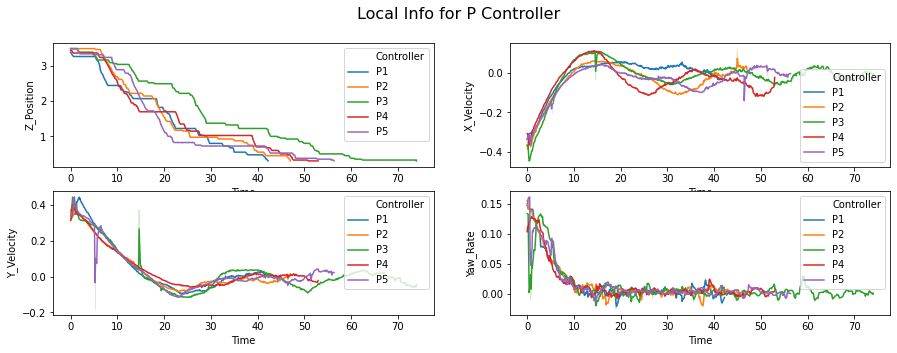

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=local_P, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=local_P, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=local_P, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=local_P, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Local Info for P Controller', fontsize=16)

In [29]:
local_PI = local_ctrl[
    (local_ctrl.Controller == "PI1") |
    (local_ctrl.Controller == "PI2") |
    (local_ctrl.Controller == "PI3") |
    (local_ctrl.Controller == "PI4") |
    (local_ctrl.Controller == "PI5")
].copy()

Text(0.5, 0.98, 'Local Info for PI Controller')

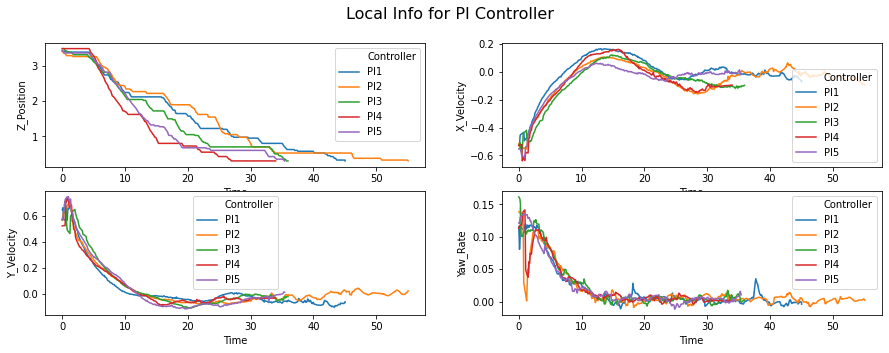

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=local_PI, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=local_PI, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=local_PI, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=local_PI, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Local Info for PI Controller', fontsize=16)

In [31]:
local_PID = local_ctrl[
    (local_ctrl.Controller == "PID1") |
    (local_ctrl.Controller == "PID2") |
    (local_ctrl.Controller == "PID3") |
    (local_ctrl.Controller == "PID4") |
    (local_ctrl.Controller == "PID5")
].copy()

Text(0.5, 0.98, 'Local Info for PID Controller')

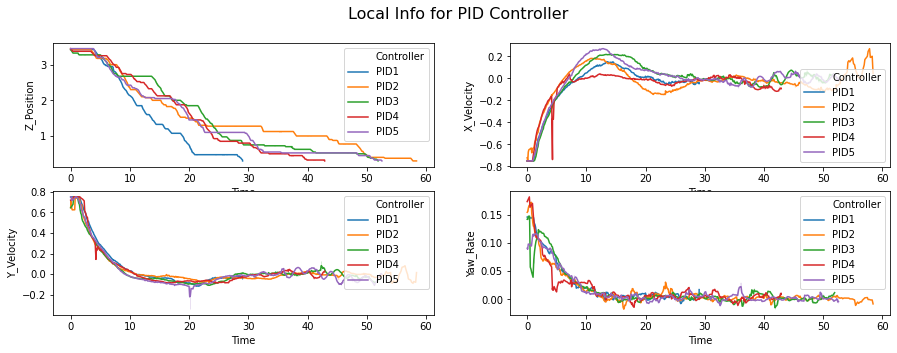

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=local_PID, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=local_PID, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=local_PID, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=local_PID, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Local Info for PID Controller', fontsize=16)

Reorganize the odometry data to plot the results for each controller.

In [39]:
odom_ctrl = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Z_Position", "X_Velocity", "Y_Velocity", "Yaw_Rate"])
    row_num = odom_data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = odom_data[test+"_time"][0:row_num+1]
    control["Z_Position"] = odom_data[test+"_pos_Z"][0:row_num+1]
    control["X_Velocity"] = odom_data[test+"_vel_X"][0:row_num+1]
    control["Y_Velocity"] = odom_data[test+"_vel_Y"][0:row_num+1]
    control["Yaw_Rate"] = odom_data[test+"_yaw_rate"][0:row_num+1]
    control["Controller"] = test
    
    odom_ctrl = odom_ctrl.append(control, ignore_index = True)

    del control

odom_ctrl

,Time,Controller,Z_Position,X_Velocity,Y_Velocity,Yaw_Rate
0,-4.547474e-13,P1,3.546532,0.087533,0.057130,0.057130
1,3.199697e-02,P1,3.550179,0.085134,0.030189,0.030189
2,7.199318e-02,P1,3.552724,0.096274,0.075065,0.075065
3,1.039901e-01,P1,3.554897,0.109877,0.070098,0.070098
4,1.359871e-01,P1,3.557152,0.107735,0.046338,0.046338
...,...,...,...,...,...,...
21390,5.245400e+01,PID5,-0.032630,-0.059877,0.018822,-0.000456
21391,5.250200e+01,PID5,-0.033166,-0.058746,0.018021,0.000711
21392,5.250200e+01,PID5,-0.033817,-0.058997,0.017939,0.005824
21393,5.254600e+01,PID5,-0.034662,-0.058008,0.018907,0.001795


In [40]:
odom_P = odom_ctrl[
    (odom_ctrl.Controller == "P1") |
    (odom_ctrl.Controller == "P2") |
    (odom_ctrl.Controller == "P3") |
    (odom_ctrl.Controller == "P4") |
    (odom_ctrl.Controller == "P5")
].copy()

Text(0.5, 0.98, 'Odometry Info for P Controller')

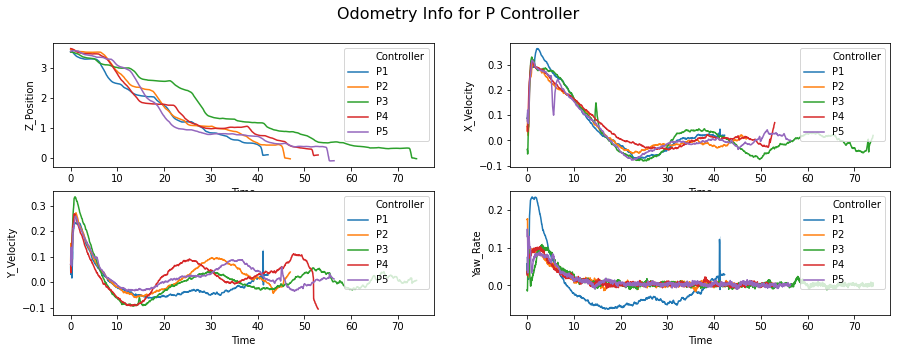

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=odom_P, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=odom_P, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=odom_P, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=odom_P, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Odometry Info for P Controller', fontsize=16)

In [42]:
odom_PI = odom_ctrl[
    (odom_ctrl.Controller == "PI1") |
    (odom_ctrl.Controller == "PI2") |
    (odom_ctrl.Controller == "PI3") |
    (odom_ctrl.Controller == "PI4") |
    (odom_ctrl.Controller == "PI5")
].copy()

Text(0.5, 0.98, 'Odometry Info for PI Controller')

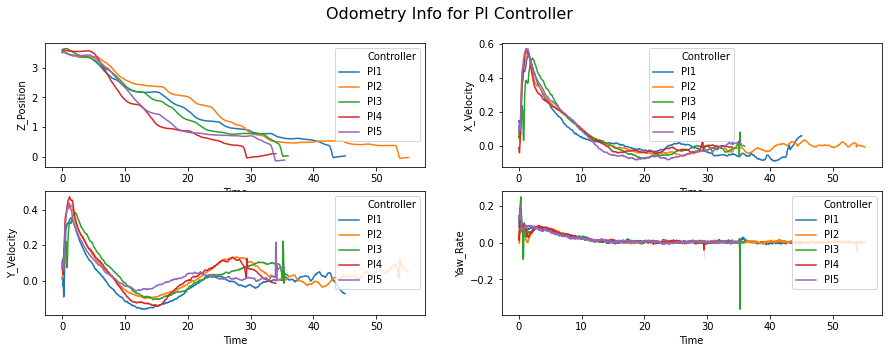

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=odom_PI, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=odom_PI, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=odom_PI, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=odom_PI, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Odometry Info for PI Controller', fontsize=16)

In [44]:
odom_PID = odom_ctrl[
    (odom_ctrl.Controller == "PID1") |
    (odom_ctrl.Controller == "PID2") |
    (odom_ctrl.Controller == "PID3") |
    (odom_ctrl.Controller == "PID4") |
    (odom_ctrl.Controller == "PID5")
].copy()

Text(0.5, 0.98, 'Odometry Info for PID Controller')

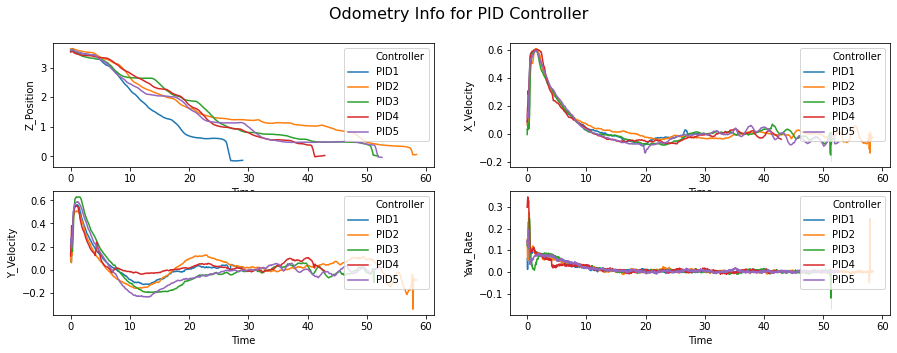

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))

sns.lineplot(data=odom_PID, x="Time", y="Z_Position",
             hue="Controller", ax=ax[0][0])
sns.lineplot(data=odom_PID, x="Time", y="X_Velocity",
             hue="Controller", ax=ax[0][1])
sns.lineplot(data=odom_PID, x="Time", y="Y_Velocity",
             hue="Controller", ax=ax[1][0])
sns.lineplot(data=odom_PID, x="Time", y="Yaw_Rate",
             hue="Controller", ax=ax[1][1])

fig.suptitle('Odometry Info for PID Controller', fontsize=16)